# TUTORIAL NOTEBOOK 
## for the CLASS_BABY and the main features I have used in previous notebooks

In [44]:
import matplotlib
#bigger fonts
matplotlib.rc('xtick', labelsize=15) 
matplotlib.rc('ytick', labelsize=15)
matplotlib.rcParams.update({'font.size': 20})

# CLASS BABY
The CLASS_BABY interact with all the files and folders cleaning form human mistakes and provide a human friendly interaction with the data of a single baby. 

In [40]:
from CLASS_BABY import *

In [2]:
b = baby('FMC003')

In [60]:
b.measurements[0]['PR']

0      127
1      127
2      126
3      121
4      119
      ... 
326    115
327    115
328    114
329    114
330    115
Name: PR, Length: 331, dtype: int64

## Accessing baby measurements

For every baby there are different measurements in different files

In [24]:
b.files

['/home/giorgio/Desktop/NHS/TOST_data/TOST FMC Data Groomed/G_FMC_PHN_003/G_FMC003_Day1_Rt Foot.csv',
 '/home/giorgio/Desktop/NHS/TOST_data/TOST FMC Data Groomed/G_FMC_PHN_003/G_FMC003_Day1_Rt wrist.csv',
 '/home/giorgio/Desktop/NHS/TOST_data/TOST FMC Data Groomed/G_FMC_PHN_003/G_PHN_FMC003_Day3_Lt Foot.csv',
 '/home/giorgio/Desktop/NHS/TOST_data/TOST FMC Data Groomed/G_FMC_PHN_003/G_PHN_FMC003_Day3_Rt wrist.csv']

Every property of the class baby which start with the keyword "measurements" means that it refers to a single file. You can use the same index to access the same file as listed in the property "files". For example as you can see from the name of the file b.files[0] is not a measurement from the PHN. While b.files[3] is a measurement from the PHN.

In [67]:
b.measurements_PHN

array([False, False,  True,  True])

In [27]:
print(b.files[0])
print(b.measurements_PHN[0])

/home/giorgio/Desktop/NHS/TOST_data/TOST FMC Data Groomed/G_FMC_PHN_003/G_FMC003_Day1_Rt Foot.csv
False


In [28]:
print(b.files[3])
print(b.measurements_PHN[3])

/home/giorgio/Desktop/NHS/TOST_data/TOST FMC Data Groomed/G_FMC_PHN_003/G_PHN_FMC003_Day3_Rt wrist.csv
True


In [69]:
b.measurements_wrist

array([False,  True, False,  True])

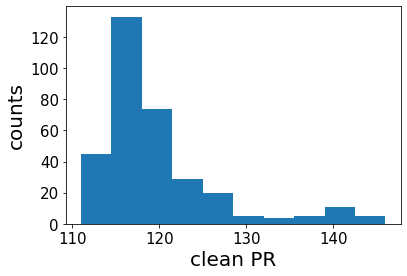

In [45]:
plt.hist(b.measurements_pr_clean[0])
plt.xlabel('clean PR')
plt.ylabel('counts')
plt.show()

## Having a first glimpse to the status of the baby

To quickly see if the baby is alright, I created the baby function "plot_baby_measurements" where as an input you only need to specify the index of the file measurements that you want to see.

G_PHN_FMC003_Day3_Rt wrist.csv


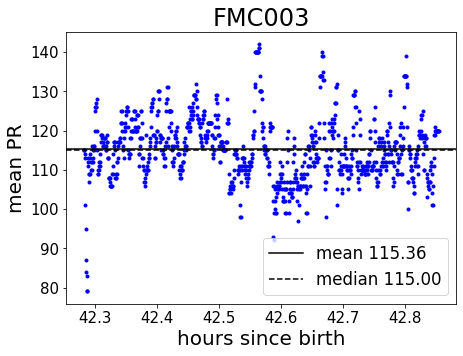

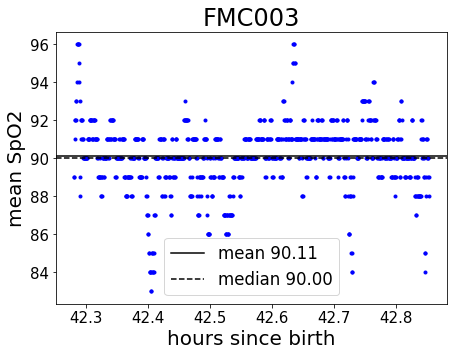

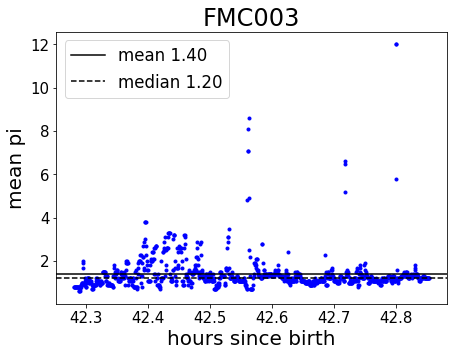

In [68]:
b.plot_baby_measurements(3)

# Global txt files
As using class can be computational expensive when exploring the properties of the entire sample of 268 babies. I created (using the notebook 006) a txt file with multiple entries for the every baby (the number of rows per baby is equivalent to the number of measurements the baby has) with the main properties. If you need to add a new property you can adapt the notebook 006 and run it just once. Then the new file with the average properties will be extremely fast to read and independent from the class baby so that even Carlton can read it with Fortran 77 and do plots with smongo. You can see an example of how to use this file in the notebook 007. Also notebook 009 is very a very good example of how to use the average_properties.txt, expecially to compute all the statistics that Prakash likes (Student T-test, Mann Whitney test, interquartile ranges...).

In [29]:
T = pd.read_csv('../TOST_data/average_properties.txt',sep='\t',index_col=0,na_values=-99)

In [35]:
T[0:10]

,BABY_IDS,GENDER,ETHNICITY,WEIGHT_GRAMS,GEST_AGE_DAYS,DELIVERY,BIRTH_DATE,FILE,DELTA_SEC_MEASURE,MED_SPO2,...,BRADY_NUM_PER_HOUR_PR_m20_anytime,BRADY_NUM_PER_HOUR_PR_m30_anytime,BRADY_NUM_PER_HOUR_PR_m40_anytime,BRADY_NUM_PER_HOUR_PR_dyn_anytime,BRADY_DURATION_MEDIAN_PR,BRADY_DURATION_MEDIAN_PR_m10,BRADY_DURATION_MEDIAN_PR_m20,BRADY_DURATION_MEDIAN_PR_m30,BRADY_DURATION_MEDIAN_PR_m40,BRADY_DURATION_MEDIAN_PR_dyn
0,FMC003,Male,White,3775.0,280.0,vaginal,2014-03-03 18:25:00,/home/giorgio/Desktop/NHS/TOST_data/TOST FMC D...,58400.0,99.0,...,0.000000,0.000000,0.000000,0.0,24.0,NaN,NaN,NaN,NaN,NaN
1,FMC003,Male,White,3775.0,280.0,vaginal,2014-03-03 18:25:00,/home/giorgio/Desktop/NHS/TOST_data/TOST FMC D...,58499.0,95.0,...,1.242236,0.000000,0.000000,0.0,59.0,NaN,NaN,NaN,NaN,NaN
2,FMC003,Male,White,3775.0,280.0,vaginal,2014-03-03 18:25:00,/home/giorgio/Desktop/NHS/TOST_data/TOST FMC D...,152294.0,94.0,...,5.240175,0.000000,0.000000,0.0,34.0,22.0,NaN,NaN,NaN,NaN
3,FMC003,Male,White,3775.0,280.0,vaginal,2014-03-03 18:25:00,/home/giorgio/Desktop/NHS/TOST_data/TOST FMC D...,152212.0,90.0,...,10.465116,1.744186,1.744186,0.0,51.0,28.0,NaN,NaN,NaN,NaN
4,FMC004,Male,Others,3420.0,279.0,vaginal,2014-03-03 17:51:00,/home/giorgio/Desktop/NHS/TOST_data/TOST FMC D...,65813.0,99.0,...,0.000000,0.000000,0.000000,0.0,18.0,NaN,NaN,NaN,NaN,NaN
5,FMC005,Female,East Indian,3510.0,273.0,Csection,2014-03-03 13:17:00,/home/giorgio/Desktop/NHS/TOST_data/TOST FMC D...,156275.0,96.0,...,0.000000,0.000000,0.000000,0.0,NaN,NaN,NaN,NaN,NaN,NaN
6,FMC005,Female,East Indian,3510.0,273.0,Csection,2014-03-03 13:17:00,/home/giorgio/Desktop/NHS/TOST_data/TOST FMC D...,156207.0,94.0,...,0.000000,0.000000,0.000000,0.0,18.0,NaN,NaN,NaN,NaN,NaN
7,FMC005,Female,East Indian,3510.0,273.0,Csection,2014-03-03 13:17:00,/home/giorgio/Desktop/NHS/TOST_data/TOST FMC D...,353779.0,97.0,...,0.000000,0.000000,0.000000,0.0,54.0,NaN,NaN,NaN,NaN,NaN
8,FMC005,Female,East Indian,3510.0,273.0,Csection,2014-03-03 13:17:00,/home/giorgio/Desktop/NHS/TOST_data/TOST FMC D...,353483.0,97.0,...,0.000000,0.000000,0.000000,0.0,62.0,NaN,NaN,NaN,NaN,NaN
9,FMC006,Female,White,3420.0,280.0,vaginal,2014-03-04 09:39:00,/home/giorgio/Desktop/NHS/TOST_data/TOST FMC D...,20358.0,99.0,...,5.278592,0.000000,0.000000,0.0,584.0,26.0,NaN,NaN,NaN,NaN


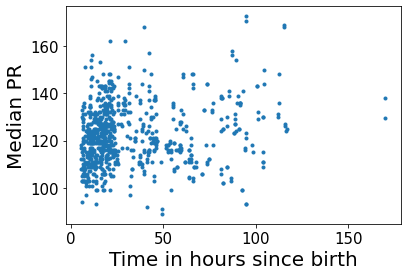

In [46]:
plt.plot(T['DELTA_SEC_MEASURE']/60./60.,T['MED_PR'],".")
plt.xlabel('Time in hours since birth')
plt.ylabel('Median PR')
plt.show()

## All datapoints ignoring names and details of babies (for machine learning uses)

Here you find all the datapoints in a single txt file ignoring fromwhich babies they come from. I have used this to train a neural network, you can see an example in notebooks 016, predicting a vital sign using another one.

These txt files have been created in notebook 018.

In [52]:
# simplest and lighter version with only PR and SpO2
pr, spo2, med_pr, med_spo2 = np.loadtxt('../TOST_data/total_datapoints.txt',unpack=True)

# Including the PI, and the seconds elapsed since the birth 
# (NP= NO PHN as in the paper we decided not to use PHN data)
# If you want to use PHN data, just remove "_NO_PHN" form the name of the file
NP_pr, NP_spo2, NP_pi, NP_med_pr, NP_med_spo2, NP_med_pi, NP_deltasec = np.loadtxt('../TOST_data/total_datapoints_deltasec_pi_NOPHN.txt',unpack=True)

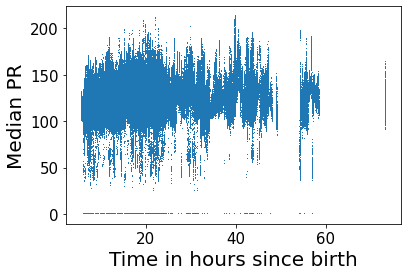

In [57]:
plt.plot(NP_deltasec/60./60.,NP_pr,",")
plt.xlabel('Time in hours since birth')
plt.ylabel('Median PR')
plt.show()